In [1]:
#importar as bibliotecas necessarias para gerar os graficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


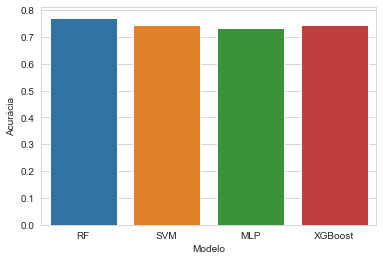

,Modelo,Acurácia
0,RF,0.771429
1,SVM,0.742857
2,MLP,0.731429
3,XGBoost,0.742857


In [4]:
# importar o arquivo csv em um dataframe e gerar um grafico de barras com sns onde cada barra representa um modelo que segue a ordem: RF, SVM, MLP, XGBoost

df_resultado = pd.read_csv('data3_table_XGBoost.csv')
#Adiciona uma coluna com o nome do modelo
df_resultado['Modelo'] = ['RF', 'SVM', 'MLP', 'XGBoost']
sns.barplot(x='Modelo', y='Acurácia', data=df_resultado)
plt.show("Desempenho dos modelos")
%matplotlib inline

# Imprime o dataframe invertendo a primeira e a ultima coluna
df_resultado.iloc[:, ::-1]


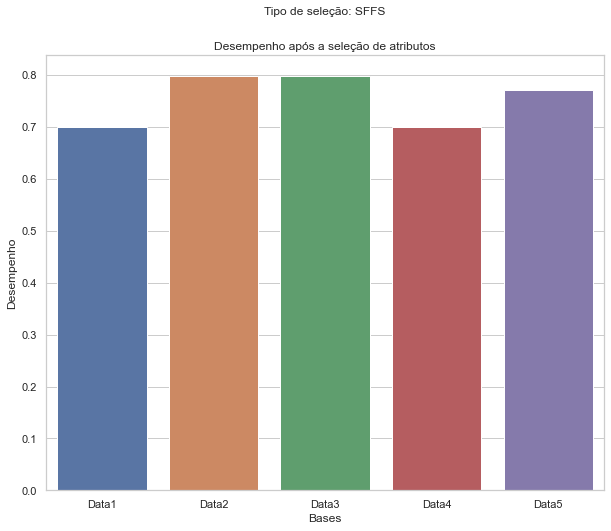

Tabela de Melhores Desempenhos:
       Desempenho
Data1    0.700670
Data2    0.798207
Data3    0.798213
Data4    0.700690
Data5    0.770680


In [12]:
# Gerar um grafico de barras com sns onde cada barra representa o desemepnho de uma base após a seleção de atributos, Data1, Data2, Data3, Data4, Data5.

# Importar os varios arquivos csv em dataframes pegando a terceira coluna e gerando um dataframe com os resultados de cada base
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def gerar_grafico_desempenho(dataframes, tipo_selecao):
    # Criar um dicionário para armazenar os melhores desempenhos de cada base
    melhores_desempenhos = {}

    # Calcular o maior desempenho presente na coluna 3 de cada dataframe
    for i, df in enumerate(dataframes):
        melhores_desempenhos[f'Data{i+1}'] = df.iloc[:, 2].max()

    # Criar um dataframe com os melhores desempenhos
    df_melhores_desempenhos = pd.DataFrame.from_dict(melhores_desempenhos, orient='index', columns=['Desempenho'])

    # Configurar o estilo do gráfico
    sns.set(style="whitegrid")

    # Gerar o gráfico de barras
    plt.figure(figsize=(10, 8))  # Definir tamanho da figura
    sns.barplot(data=df_melhores_desempenhos, x=df_melhores_desempenhos.index, y='Desempenho')  # Gerar o gráfico de barras
    plt.xlabel('Bases')  # Definir o rótulo do eixo x
    plt.ylabel('Desempenho')  # Definir o rótulo do eixo y
    plt.title('Desempenho após a seleção de atributos')  # Definir o título do gráfico

    # Adicionar o tipo de seleção de atributos acima do gráfico
    plt.text(0.5, 1.1, f'Tipo de seleção: {tipo_selecao}', ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()  # Mostrar o gráfico

    # Imprimir a tabela com os melhores desempenhos
    print("Tabela de Melhores Desempenhos:")
    print(df_melhores_desempenhos)


# Exemplo de uso da função
data1 = pd.read_csv('results/SFFS_data1.csv')
data2 = pd.read_csv('results/SFFS_data2.csv')
data3 = pd.read_csv('results/SFFS_data3.csv')
data4 = pd.read_csv('results/SFFS_data5.csv')
data5 = pd.read_csv('results/SFFS_data6.csv')

dataframes = [data1, data2, data3, data4, data5]

tipo_selecao = "SFFS"  # Definir o tipo de seleção de atributos

gerar_grafico_desempenho(dataframes, tipo_selecao)


In [14]:
# pegar a linha do data2 e data3 que tem o melhor avg_score e pega as features selecionadas e compara quais são iguais e quais são diferentes
# Get the rows with the best avg_score

# Get the rows with the best avg_score
best_data2 = data2.loc[data2['avg_score'].idxmax()]
best_data3 = data3.loc[data3['avg_score'].idxmax()]

# Get the selected features
features2 = best_data2['feature_names'].split(',')
features3 = best_data3['feature_names'].split(',')

# Compare the features
same_features = []
different_features = []
for feature in features2:
    if feature in features3:
        same_features.append(feature)
    else:
        different_features.append(feature)

# Print the results
print(f'The same features are: {same_features}')
print(f'The different features are: {different_features}')


The same features are: [" 'O'", " 'AS'", " 'E_4.0'", " 'AA_3.0'", " 'CS')"]
The different features are: ["('M'", " 'AT'", " 'I_4.0'", " 'J_1.0'", " 'BW'", " 'BY'", " 'CC'", " 'CG'", " 'CI'", " 'CK'", " 'CP'", " 'CQ'"]


In [124]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

# Sem WHOQOL:
base1 = pd.read_csv('Datasets/dataframe_socioeconomico_Niveis.csv')
data1 = base1.drop('Nivel_MHI', axis=1)
target1 = base1['Nivel_MHI']
le = LabelEncoder()
target1 = le.fit_transform(target1)

# Realizar Random Under-Sampling
sampler = RandomUnderSampler()
data1_re, target1_re = sampler.fit_resample(data1, target1)


# com todas as respostas do WHOQOL
base2 = pd.read_csv('Datasets/df_social_whoqol_tratado_1.csv')
data2 = base2.drop('Nivel_MHI', axis=1)
target2 = base2['Nivel_MHI']
target2 = le.fit_transform(target2)
sampler = RandomUnderSampler()
data2_re, target2_re = sampler.fit_resample(data2, target2)


# só com o indice dos dominiosdo WHOQOL, concatenar base1 com final da base2
data3 = pd.concat([data1, base2.loc[:,['CR','CS','CT','CU']]], axis=1)
target3 = base2['Nivel_MHI']
target3 = le.fit_transform(target3)
sampler = RandomUnderSampler()
data3_re, target3_re = sampler.fit_resample(data3, target3)


# Só com a qualidade de vida do WHOQOL
data4 = pd.concat([data1, base2['BR']], axis=1)
target4 = base2['Nivel_MHI']
target4 = le.fit_transform(target4)
sampler = RandomUnderSampler()
data4_re, target4_re = sampler.fit_resample(data4, target4)

# Qualidade de Vida Geral ( Media das duas primeiras questões do WHOQOL)
# Pegar a média das duas primeiras colunas da base2, pelo indice
data5 = pd.concat([data1, base2.loc[:,['BR','BS']].mean(axis=1)], axis=1)
target5 = base2['Nivel_MHI']
target5 = le.fit_transform(target5)
sampler = RandomUnderSampler()
data5.columns = data5.columns.astype(str)
data5_re, target5_re = sampler.fit_resample(data5, target5)

# Media de todos os dominios do WHOQOL
data6 = pd.concat([data1, base2.loc[:,['CR','CS','CT','CU']].mean(axis=1)], axis=1)
target6 = base2['Nivel_MHI']
target6 = le.fit_transform(target6)
sampler = RandomUnderSampler()
data6.columns = data6.columns.astype(str)
data6_re, target6_re = sampler.fit_resample(data6, target6)


In [211]:
# Carregar modelo pickle e gerar matriz de confusão
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Carregar o modelo pickle
with open('modelo2.pkl', 'rb') as f:
    data3_model = pickle.load(f)

print(data3_model)
# Seleciona as features da coluna feature_idx de sffs_dt2 para pegar do data2_re
sffs_dt3 = pd.read_csv('results/SBFS_data2.csv')

# A coluna featur_idx é uma tupla, então é necessário transformar em string e depois em lista, pegar somente a linha com o maior avg_score e depois transformar em lista de inteiros
features = sffs_dt3['feature_idx'].astype(str).loc[sffs_dt3['avg_score'].idxmax()]
features = features.replace('(', '').replace(')', '').replace(',', '').split(' ')
features = [int(feature) for feature in features]

print(features)
# Seleciona as features do data2_re
dt2_sffs_sel = data2_re.iloc[:, features]


# Divide o data2_re em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dt2_sffs_sel, target3_re, test_size=0.2)

# Treina o modleo com o data2_re
data3_model.fit(X_train, y_train)

# Gera a matriz de confusão
y_pred = data3_model.predict(X_test)
y_pred_N = le.inverse_transform(y_pred)
print(y_pred_N)
y_test_N = le.inverse_transform(y_test)
print(y_test_N)
cm = confusion_matrix(y_test_N, y_pred_N, labels=le.classes_)
print(cm)
# Criar classification report
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))
# Reverter o label encode para o classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))
#print(y_pred)
# Gera o gráfico da matriz de confusão
#plt.figure(figsize=(10, 7))


RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10)
[9, 16, 22, 27, 50, 52, 54, 55, 60, 65, 72, 79, 80, 81]
['Alto' 'Medio' 'Medio' 'Medio' 'Medio' 'Baixo' 'Alto' 'Alto' 'Alto'
 'Medio' 'Baixo' 'Alto' 'Medio' 'Alto' 'Baixo' 'Alto' 'Medio' 'Baixo'
 'Medio' 'Alto' 'Baixo' 'Baixo' 'Alto' 'Alto' 'Baixo' 'Baixo' 'Medio'
 'Alto' 'Baixo' 'Baixo' 'Baixo' 'Alto' 'Baixo' 'Baixo' 'Medio' 'Alto'
 'Alto' 'Baixo' 'Alto' 'Baixo' 'Baixo' 'Baixo' 'Baixo' 'Alto' 'Baixo'
 'Medio' 'Alto' 'Alto' 'Alto' 'Baixo' 'Alto' 'Baixo' 'Baixo' 'Baixo'
 'Alto' 'Alto' 'Medio' 'Baixo' 'Baixo' 'Alto' 'Alto' 'Baixo' 'Baixo'
 'Alto' 'Baixo' 'Alto' 'Medio' 'Medio' 'Medio' 'Alto' 'Medio' 'Baixo'
 'Medio' 'Medio' 'Alto' 'Baixo' 'Alto' 'Medio' 'Alto' 'Medio' 'Medio'
 'Baixo' 'Medio' 'Medio' 'Baixo' 'Alto' 'Baixo' 'Medio' 'Alto' 'Medio']
['Alto' 'Medio' 'Medio' 'Medio' 'Medio' 'Baixo' 'Alto' 'Alto' 'Alto'
 'Medio' 'Baixo' 'Alto' 'Medio' 'Medio' 'Baixo' 'Alto'

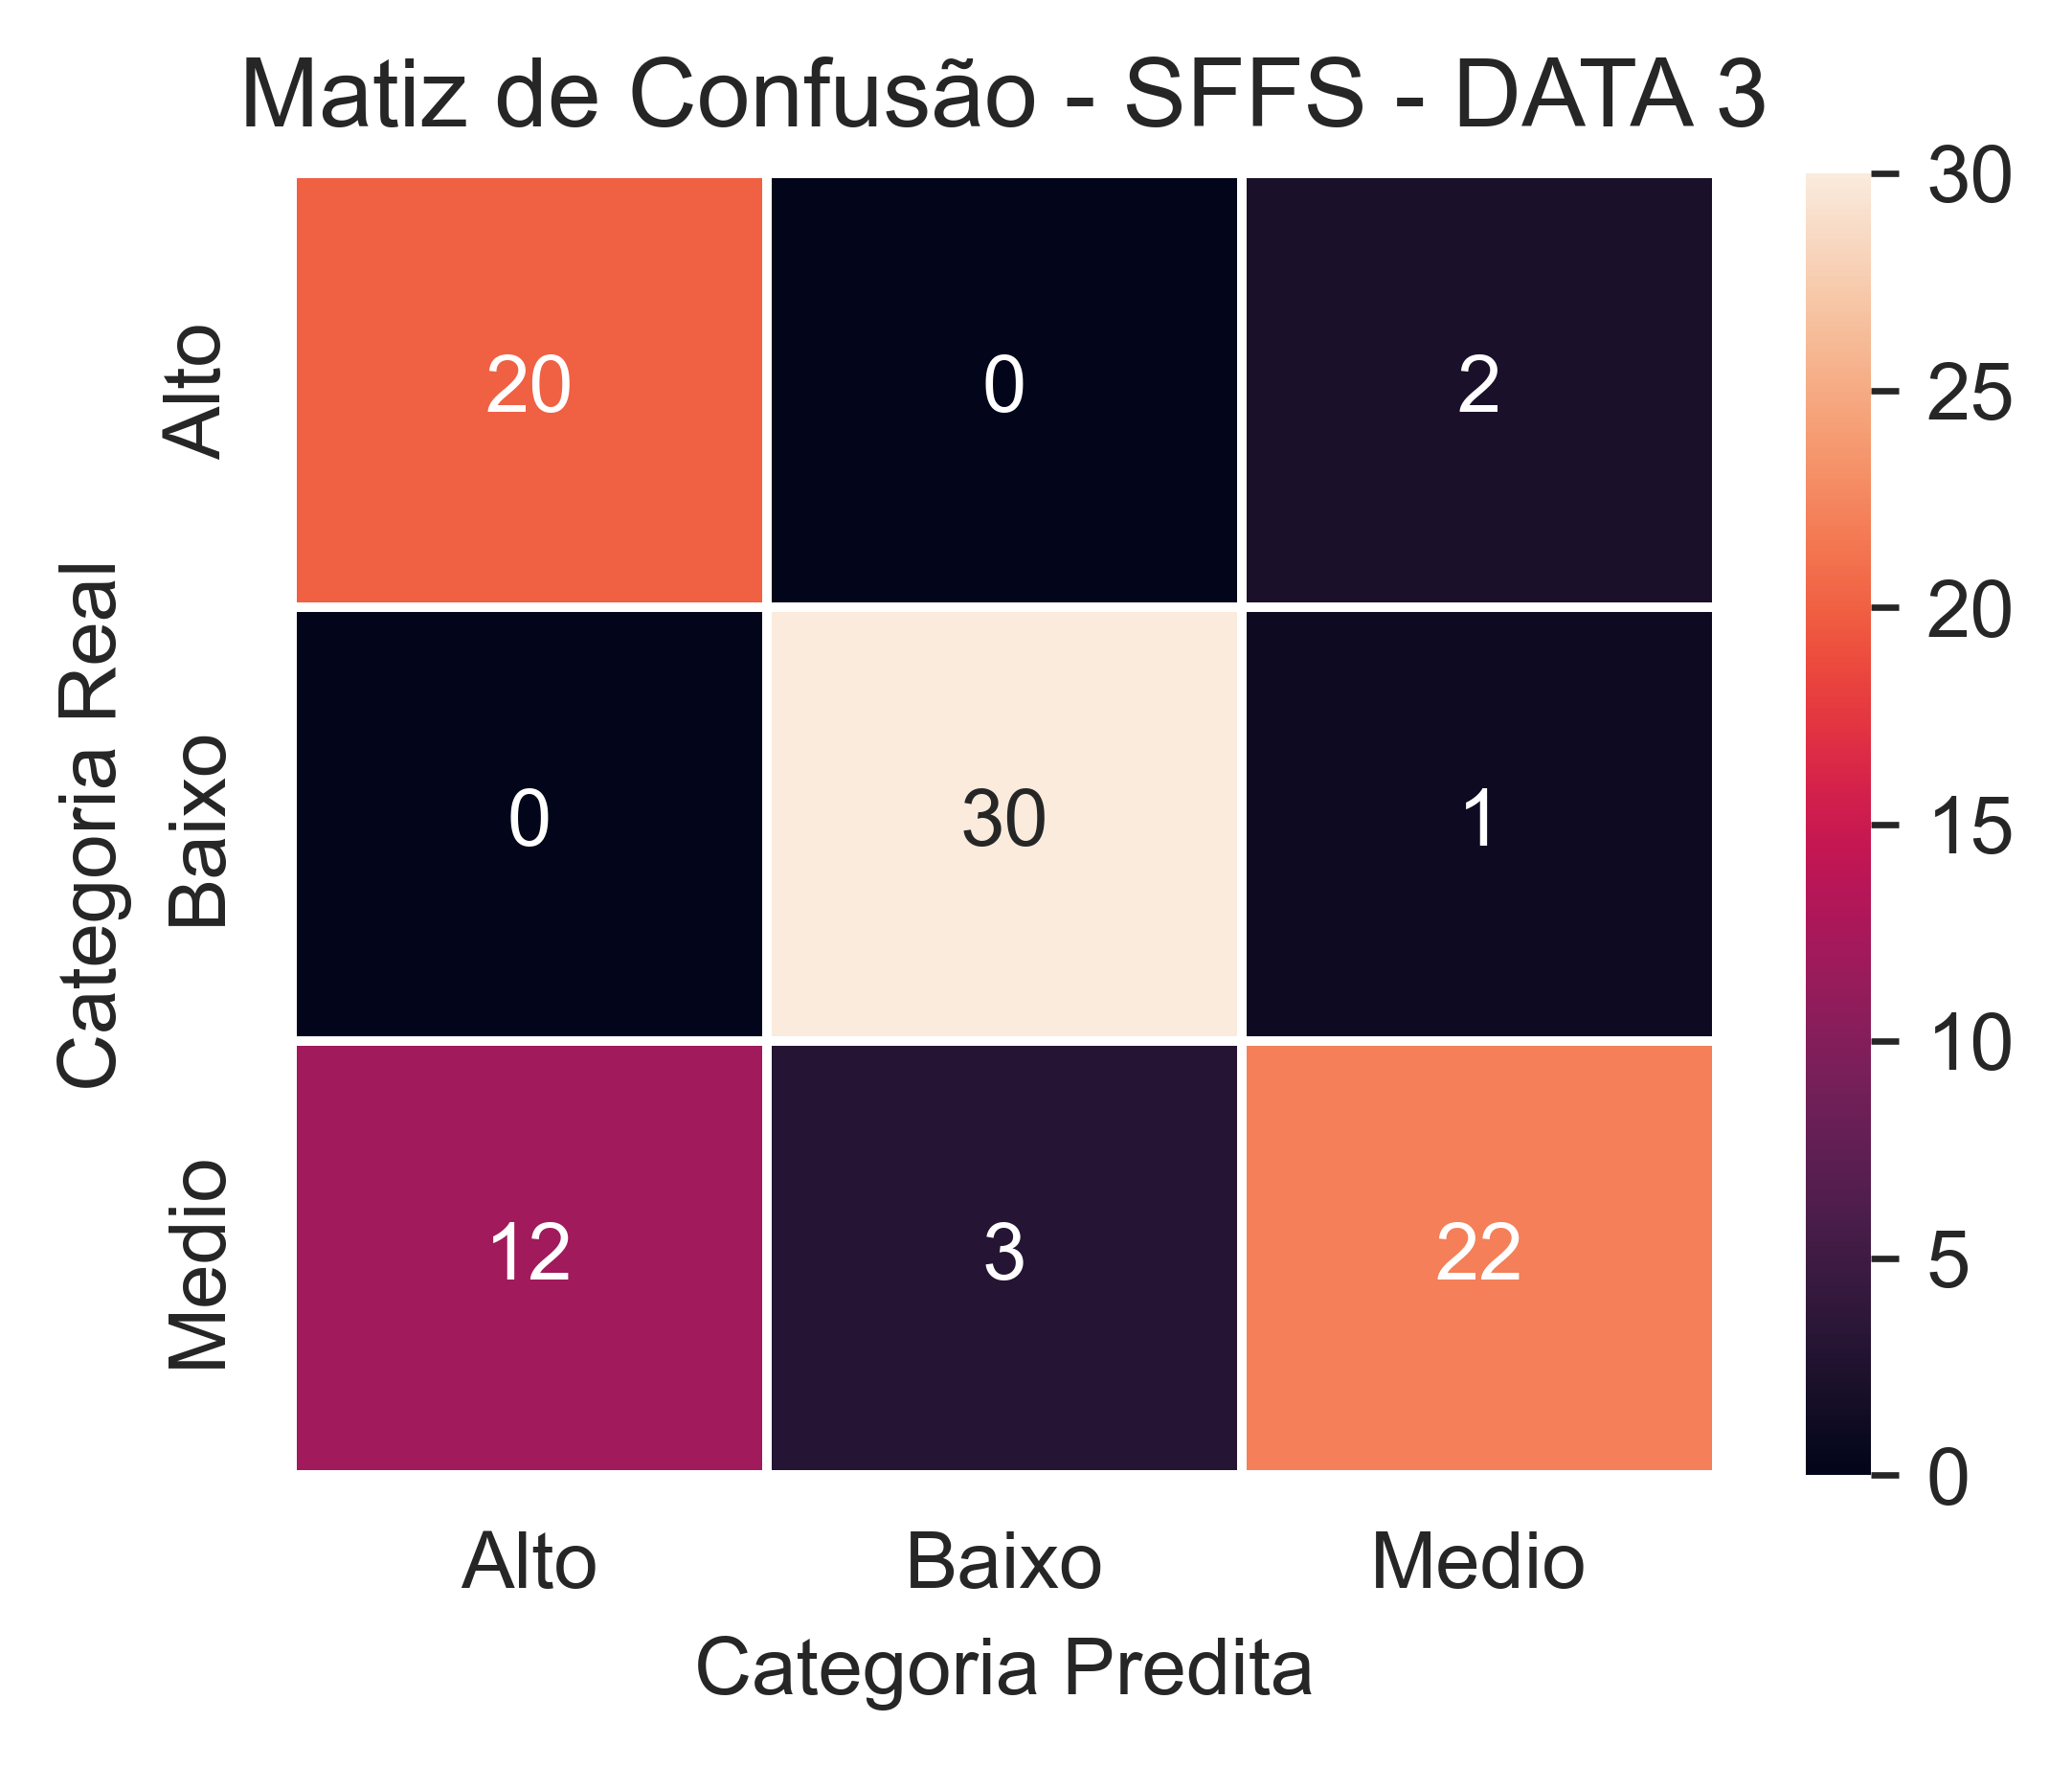

In [213]:
plt.figure(figsize=(4, 3),
           dpi = 600)
sns.heatmap(cm, annot=True, fmt='d', linewidths=1,xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Categoria Predita')
plt.ylabel('Categoria Real')
plt.title('Matriz de Confusão - SFFS - DATA 3')
plt.show()

65
[5, 7, 16, 17, 35, 39, 40, 47, 59, 61, 65, 69, 71, 73, 78, 79, 81]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.76      0.86      0.81        22
           2       0.57      0.65      0.61        31

    accuracy                           0.71        90
   macro avg       0.72      0.73      0.72        90
weighted avg       0.73      0.71      0.71        90

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10)


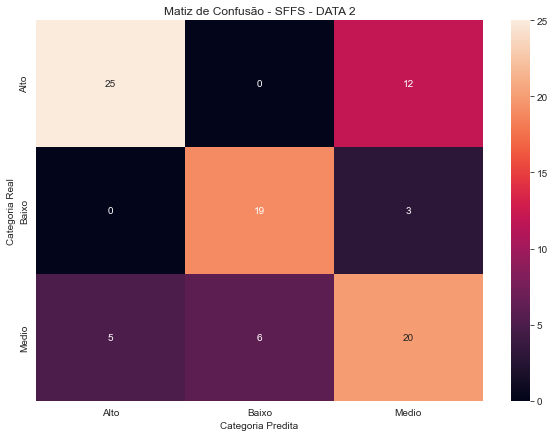

In [158]:
# Carregar modelo pickle e gerar matriz de confusão
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Carregar o modelo pickle
with open('modelo2.pkl', 'rb') as f:
    data2_model = pickle.load(f)

print(data2_model.n_features_in_)
# Seleciona as features da coluna feature_idx de sffs_dt2 para pegar do data2_re
sffs_dt2 = pd.read_csv('results/SFFS_data2.csv')

# A coluna featur_idx é uma tupla, então é necessário transformar em string e depois em lista, pegar somente a linha com o maior avg_score e depois transformar em lista de inteiros
features = sffs_dt2['feature_idx'].astype(str).loc[sffs_dt2['avg_score'].idxmax()]
features = features.replace('(', '').replace(')', '').replace(',', '').split(' ')
features = [int(feature) for feature in features]

print(features)
# Seleciona as features do data2_re
data2_re_selectd = data2_re.iloc[:, features]


# Divide o data2_re em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2_re_selectd, target3_re, test_size=0.2)

# Treina o modleo com o data2_re
data2_model.fit(X_train, y_train)

# Gera a matriz de confusão
y_pred = data2_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Criar classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(data2_model)
# Gera o gráfico da matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Categoria Predita')
plt.ylabel('Categoria Real')
plt.title('Matiz de Confusão - SFFS - DATA 2')
plt.show()




In [60]:
with open('data6_best_model.pkl', 'rb') as f:
    aaaaaa = pickle.load(f)

print(aaaaaa.)

AttributeError: 'XGBClassifier' object has no attribute 'best_estimator_'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2757610896.py, line 22)